### By-hand data fitting
So, let's just try to see if we can get a good fit to the best of the data with values that we pretty much know - really to look to see if the central peak of the data is defnitely wrong

In [7]:
import pickle
import math
import numpy as np
from scipy.special import jv, yv, jve, yve
import matplotlib.pyplot as plt
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import tensorflow as tf
import csv
import sys
import mie_data_generator_function as mdg

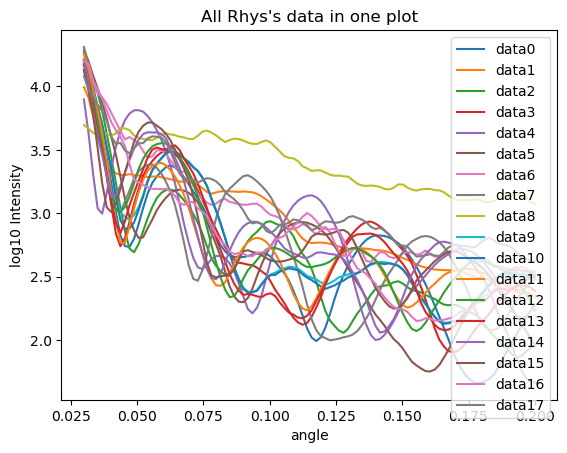

In [8]:
#This cell imports Rhys's data
# #root = '/Users/sam/Documents/Nano-Mei'
root = '/Users/wsb/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofSouthampton/Phase retrieval with neural nets - Documents/nanoparticle Mie scattering project/mie Python code/wsb working'

ints = np.zeros([18,100], dtype ="float")
angles = np.zeros([18,100], dtype ="float")

with open("{}/rhys_intensities.txt".format(root), "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # Load the data from the file
    line_count = 0
    for row in csv_reader:
        
        #print(len(row))
        ints[line_count,:] = row[:] 
        line_count+=1

with open("{}/rhys_angles.txt".format(root), "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # Load the data from the file
    line_count = 0
    for row in csv_reader:
        angles[line_count,:] = row[:] 
        line_count+=1

max_log_I = 10  # this is setting the number I'm scaling to
#for ii in range(ints.shape[0]):
#    foo = ints[ii,:]
#    ints[ii,:] = max_log_I * foo/foo[0]

#check teh data form...

fig, ax = plt.subplots()
#ax.plot(angles2,log_np_I[ii,:], label='training data')
for jj in range(18):
    ax.plot(angles[jj,:], ints[jj,:], label='data{}'.format(jj))
#ax[1].plot(angles[jj,:], ints[jj,:])
    ax.legend(loc='upper right')
    ax.set_xlabel('angle')
    ax.set_ylabel('log10 Intensity')
plt.title('All Rhys\'s data in one plot')
plt.show()

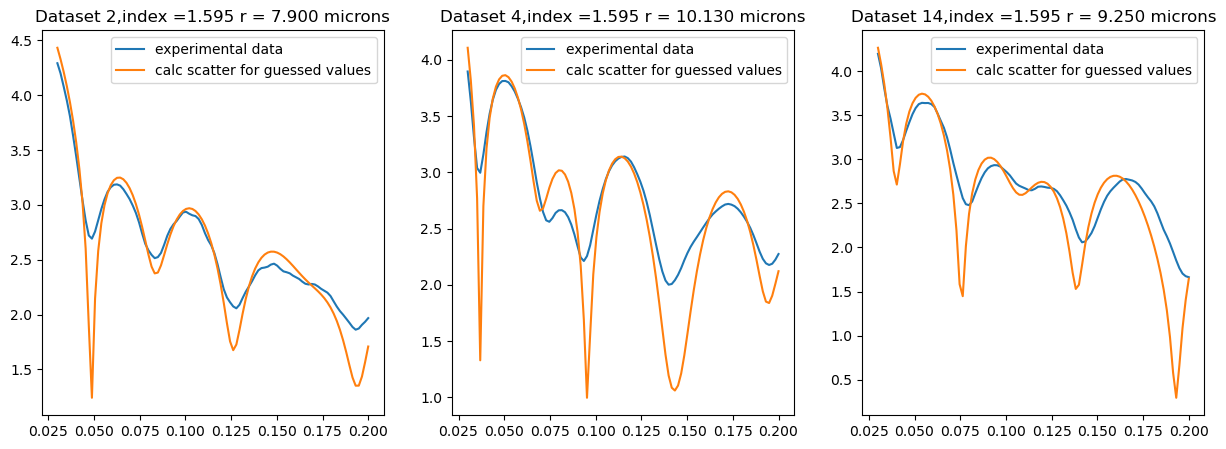

In [9]:
#make a array to hold all the by hand values
best_vals = np.zeros((np.size(ints, 0), 3))
best_vals[4,:] = 10.13e-6, 1.595, -2.2
best_vals[14,:] = 9.25e-6, 1.595, -2.2
best_vals[2,:] = 7.9e-6, 1.595, -2.2
d = [2,4,14]
fig, ax = plt.subplots(1,3, figsize = (15,5))
#now set up the bead info for data simulation
theta_start = 0.03
theta_end = 0.2
th_steps = 100
theta = np.linspace(theta_start, theta_end, th_steps)
#set up the indices
background_index = 1
lambda_ = 632.8646e-9  #HeNe wavelength
for i in range(0, len(d)):
    rad = best_vals[d[i],0]
    bead_index = best_vals[d[i],1]
    shift_up = best_vals[d[i],2]
    #theta, Icalc = mdg.generate_data(bead_index, rad)  #need to make this use mie_theta
    Icalc = mdg.mie_theta(lambda_,theta.reshape(1,th_steps) , rad, background_index, bead_index )
    Icalc = np.log10(Icalc)
    Icalc = Icalc + shift_up
    ax[i].plot(angles[d[i],:], ints[d[i],:], label='experimental data')
    ax[i].plot(theta, Icalc,label='calc scatter for guessed values')
    ax[i].legend(loc='upper right')
    #ax[i].plot(angles[d,:], ints[d,:]-Icalc, label='difference')
    #title_str  = 'index =%g r = %g microns' % (y_pred[d,0],y_pred[d,1])
    ax[i].set_title('Dataset {},index ={:.3f} r = {:.3f} microns'.format(d[i],bead_index, rad*1e6))  

 #plt.show()  

So, it's REALLY sensitive to the parameters, and this seems about the best I can do for dataset 14 - 8.9um and about 1.6. The model gives 8.4um and an indexd of 2.17
If I try dataset 10, I get 1.61 and 7.9um, which is probably a good guess. The issue always seems to be extra intensity nearer the centre. So could that be a flaw in data processing or in the experiment?
